<a href="https://colab.research.google.com/github/Smchavan491/Data-Science-Practicals/blob/main/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data_Cleaning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
data = pd.read_csv('AirQuality.csv', sep = ';')

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
data.shape

(9471, 17)

#1) Data Cleaning

In [ ]:
data.duplicated().sum()

np.int64(113)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9358 entries, 0 to 9357
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.3+ MB


In [ ]:
data.isna().sum()

,0
Date,1
Time,1
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1


In [ ]:
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1, inplace = True)

In [ ]:
data = data.rename(columns={'T': 'Tempeature'})
data = data.rename(columns={'RH': 'Relative Humidity'})
data = data.rename(columns={'AH': 'Absolute Humidity'})

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
data['CO(GT)'] = data['CO(GT)'].str.replace(',','.').astype(float)
data['C6H6(GT)'] = data['C6H6(GT)'].str.replace(',','.').astype(float)
data['Tempeature'] = data['Tempeature'].str.replace(',','.').astype(float)
data['Relative Humidity'] = data['Relative Humidity'].str.replace(',','.').astype(float)
data['Absolute Humidity'] = data['Absolute Humidity'].str.replace(',','.').astype(float)

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
data.drop(['Date', 'Time'], axis = 1, inplace = True)

In [ ]:
data.isna().sum()

,0
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1
PT08.S4(NO2),1
PT08.S5(O3),1


In [ ]:
data.duplicated().sum()

np.int64(31)

In [ ]:
data.drop_duplicates()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
data.isna().sum()

,0
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1
PT08.S4(NO2),1
PT08.S5(O3),1


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [ ]:
data.shape

(9357, 13)

#2) Data Integration

In [ ]:
Common_Columns = ['CO(GT)','NO2(GT)']

In [ ]:
data1 = data[Common_Columns + ['C6H6(GT)', 'NOx(GT)']]

In [ ]:
data2 = data[Common_Columns + ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Tempeature', 'Relative Humidity', 'Absolute Humidity' ]]

In [ ]:
data1_sample = data1.head(100)
data2_sample = data2.head(100)

In [ ]:
inner_merged = pd.merge(data1_sample, data2_sample, on = Common_Columns, how = 'inner')

In [ ]:
inner_merged.head()

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,2.6,113.0,11.9,166.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
left_merged = pd.merge(data1_sample, data2_sample, on = Common_Columns, how = 'left')

In [ ]:
left_merged.head()

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,2.6,113.0,11.9,166.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
concat_rows = pd.concat([data1_sample, data2_sample], axis = 0)

In [ ]:
concat_rows

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,2.6,113.0,11.9,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,92.0,9.4,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2,114.0,9.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.2,122.0,9.2,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.6,116.0,6.5,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.9,128.0,NaN,NaN,1438.0,1051.0,943.0,1668.0,1206.0,21.3,30.8,0.7696
96,2.5,121.0,NaN,NaN,1478.0,1055.0,929.0,1671.0,1262.0,19.7,36.7,0.8307
97,4.6,157.0,NaN,NaN,1808.0,1312.0,753.0,1993.0,1698.0,18.4,41.7,0.8732
98,5.9,173.0,NaN,NaN,1898.0,1381.0,681.0,2103.0,1905.0,17.6,46.1,0.9210


In [ ]:
concat_columns = pd.concat([data1_sample, data2_sample], axis = 1)

In [ ]:
concat_columns

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),CO(GT),NO2(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,2.6,113.0,11.9,166.0,2.6,113.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,2.0,92.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,2.2,114.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,2.2,122.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1.6,116.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.9,128.0,12.0,180.0,2.9,128.0,1438.0,1051.0,943.0,1668.0,1206.0,21.3,30.8,0.7696
96,2.5,121.0,12.2,160.0,2.5,121.0,1478.0,1055.0,929.0,1671.0,1262.0,19.7,36.7,0.8307
97,4.6,157.0,20.6,261.0,4.6,157.0,1808.0,1312.0,753.0,1993.0,1698.0,18.4,41.7,0.8732
98,5.9,173.0,23.1,325.0,5.9,173.0,1898.0,1381.0,681.0,2103.0,1905.0,17.6,46.1,0.9210


In [ ]:
df['Absolute Humidity'] = df['Absolute Humidity'].multiply(100)

#3) Error detection

Text(0.5, 1.0, 'Box Plot')

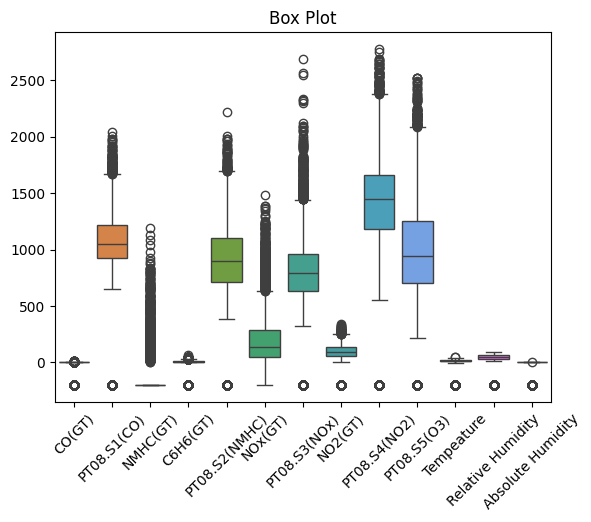

In [ ]:
sns.boxplot(data)
plt.xticks(rotation = 45)
plt.title('Box Plot')

In [ ]:
def remove_outliers(data, column, lower = 0.01, upper = 0.99):
  lower_bound = data[column].quantile(lower)
  upper_bound = data[column].quantile(upper)
  cleaned_data = data[(data[column]>=lower_bound) & (data[column] <= upper_bound)]
  outliers = data[(data[column]<=lower_bound) | (data[column] >= upper_bound)]
  return cleaned_data, outliers

In [ ]:
df = data.copy()
all_outliers = {}
for i in data.columns:
  cleaned_data, outliers = remove_outliers(df,i)
  df = cleaned_data
  all_outliers[i] = outliers


In [ ]:
df = df.reset_index().drop('index', axis=1)

In [ ]:
df.shape

(8219, 13)

Text(0.5, 1.0, 'Box Plot')

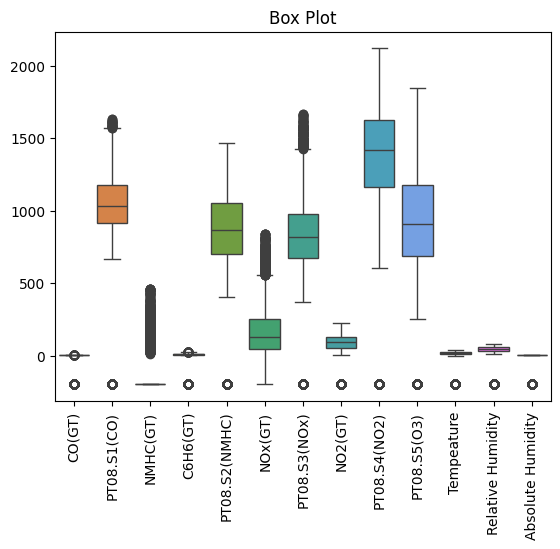

In [ ]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title('Box Plot')

#4) Data Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = df.select_dtypes(include = ['number']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Tempeature,Relative Humidity,Absolute Humidity
0,0.981589,0.849673,0.530303,0.935128,0.746108,0.352262,0.673458,0.733021,0.815517,0.717147,0.892231,0.879816,0.994024
1,0.978682,0.812636,0.472727,0.924095,0.691617,0.291627,0.736729,0.683841,0.758190,0.572545,0.890977,0.875574,0.993864
2,0.979651,0.872549,0.436364,0.922330,0.682036,0.318576,0.718499,0.735363,0.756466,0.622374,0.885129,0.897844,0.993987
3,0.979651,0.858388,0.424242,0.923213,0.687425,0.358037,0.692761,0.754098,0.768966,0.685393,0.881370,0.919053,0.994167
4,0.976744,0.801743,0.380303,0.911297,0.620359,0.318576,0.753351,0.740047,0.728448,0.639961,0.882206,0.917639,0.994178


#5) Data Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = df.dropna()

In [ ]:
y = df['Tempeature']
X = df.drop('Tempeature', axis = 1)

In [ ]:
print("X shape:", X.shape)  # Should match y.shape[0]
print("y shape:", y.shape)


X shape: (8219, 12)
y shape: (8219,)


In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 10, shuffle = True)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (6575, 12)
y_train shape: (1644, 12)


In [ ]:
y = df['Tempeature']
X = df.drop('Tempeature',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10,shuffle=True)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)
# Decision Tree Regressor Model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg_preds = tree_reg.predict(X_test)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_preds = rf_reg.predict(X_test)
# Evaluation Metrics for Linear Regression
lin_reg_r2 = r2_score(y_test, lin_reg_preds)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_preds)
lin_reg_mse = mean_squared_error(y_test, lin_reg_preds)
lin_reg_accuracy = lin_reg_r2 * 100 # Accuracy as percentage
# Evaluation Metrics for Decision Tree Regressor
tree_reg_r2 = r2_score(y_test, tree_reg_preds)
tree_reg_mae = mean_absolute_error(y_test, tree_reg_preds)
tree_reg_mse = mean_squared_error(y_test, tree_reg_preds)
tree_reg_accuracy = tree_reg_r2 * 100 # Accuracy as percentage
# Evaluation Metrics for Random Forest Regressor
rf_reg_r2 = r2_score(y_test, rf_reg_preds)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_preds)
rf_reg_mse = mean_squared_error(y_test, rf_reg_preds)
rf_reg_accuracy = rf_reg_r2 * 100 # Accuracy as percentage

In [ ]:
print("Linear Regression:")
print(f' Mean Squared Error: {lin_reg_mse}')
print(f' Mean Absolute Error: {lin_reg_mae}')
print(f' R² Score: {lin_reg_r2}')
print(f' Accuracy: {lin_reg_accuracy:.2f}%')
print("\nDecision Tree Regressor:")
print(f' Mean Squared Error: {tree_reg_mse}')
print(f' Mean Absolute Error: {tree_reg_mae}')
print(f' R² Score: {tree_reg_r2}')
print(f' Accuracy: {tree_reg_accuracy:.2f}%')
# Print the metrics
print(f"\nRandom Forest Regressor R² Score: {rf_reg_r2:.4f}")
print(f"Random Forest Regressor MAE: {rf_reg_mae:.4f}")
print(f"Random Forest Regressor MSE: {rf_reg_mse:.4f}")
print(f"Random Forest Regressor Accuracy: {rf_reg_accuracy:.2f}%")

Linear Regression:
 Mean Squared Error: 0.00014690170778673502
 Mean Absolute Error: 0.009394488844115614
 R² Score: 0.9951939653387994
 Accuracy: 99.52%

Decision Tree Regressor:
 Mean Squared Error: 6.977599184521918e-06
 Mean Absolute Error: 0.0015854721963058495
 R² Score: 0.9997717209415873
 Accuracy: 99.98%

Random Forest Regressor R² Score: 0.9999
Random Forest Regressor MAE: 0.0008
Random Forest Regressor MSE: 0.0000
Random Forest Regressor Accuracy: 99.99%


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors='coerce')
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

KeyError: 'Date'